In [62]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Importando DataSet

In [65]:
dataset = pd.read_csv('Employee_Compensation_SF.csv', sep=',')
# dataset = dataset.sample(100000)

In [66]:
to_be_removed = ['Year Type','Union','Department','Organization Group Code','Department Code','Union Code','Job Family Code','Job Code','Job','Employee Identifier', 'Retirement','Health/Dental', 'Other Benefits', 'Salaries', 'Overtime','Other Salaries', 'Total Salary','Total Benefits']
ds = dataset.drop(to_be_removed,axis=1)
ds.head()

,Year,Organization Group,Job Family,Total Compensation
0,2016,Public Protection,Legal & Court,159436.65
1,2013,Culture & Recreation,"Budget, Admn & Stats Analysis",120054.05
2,2015,Community Health,Human Services,13868.64
3,2015,Community Health,Medical & Dental,3718.50
4,2014,Culture & Recreation,Recreation,10128.64


In [67]:
print(
    len(dataset['Job Family'].unique()),
    len(dataset['Department'].unique())
)

56 54


## Dropando as observações que possuem algum dado faltando

In [68]:
ds[ds.isnull().any(axis=1)].shape

(45, 4)

In [69]:
ds.drop(ds[ds.isnull().any(axis=1)].index, inplace=True)

In [70]:
ds.head()

,Year,Organization Group,Job Family,Total Compensation
0,2016,Public Protection,Legal & Court,159436.65
1,2013,Culture & Recreation,"Budget, Admn & Stats Analysis",120054.05
2,2015,Community Health,Human Services,13868.64
3,2015,Community Health,Medical & Dental,3718.50
4,2014,Culture & Recreation,Recreation,10128.64


In [71]:
extract_columns = ['Job Family','Organization Group']
_ds = pd.get_dummies(ds, columns=extract_columns, prefix=extract_columns)
_ds.head()

,Year,Total Compensation,Job Family_Administrative & Mgmt (Unrep),Job Family_Administrative Secretarial,Job Family_Administrative-DPW/PUC,Job Family_Administrative-Labor & Trades,Job Family_Agriculture & Horticulture,Job Family_Airport Operation,Job Family_Appraisal & Taxation,"Job Family_Budget, Admn & Stats Analysis",...,Job Family_Street Transit,Job Family_Sub-Professional Engineering,Job Family_Supervisory-Labor & Trade,Organization Group_Community Health,Organization Group_Culture & Recreation,Organization Group_General Administration & Finance,Organization Group_General City Responsibilities,Organization Group_Human Welfare & Neighborhood Development,Organization Group_Public Protection,"Organization Group_Public Works, Transportation & Commerce"
0,2016,159436.65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2013,120054.05,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2015,13868.64,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2015,3718.50,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2014,10128.64,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [72]:
_ds.shape

(291780, 64)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [74]:
clf = Ridge(alpha=1.0)

X = _ds.drop(['Total Compensation'], axis=1)
y = _ds['Total Compensation'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [75]:
clf.fit(X_train, y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
predict = clf.predict(X_test)
# linear_predict = linear_reg.predict(X_test)

print("Ridge: ", mean_squared_error(y_test,predict))
# print("Linear: ", mean_squared_error(y_test,linear_predict))

Ridge:  3073061153.165833


In [77]:
predict[:10]

array([ 97492.84357661, 185700.19524776, 184373.99485713,  86033.30099473,
       149445.03856978,  16104.01564499, 148257.41150625,  89691.6191316 ,
        41624.98312668, 119620.87291367])

In [78]:
y_test[:10]

[92791.25,
 226531.85,
 231814.37,
 78744.49,
 60258.56,
 27853.33,
 211953.49,
 121006.43,
 21048.82,
 15460.97]

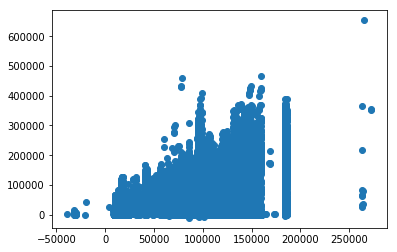

In [79]:
plt.scatter(predict, y_test)